In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
exportacao_vinho_df = pd.read_csv("dados\ExpVinho.csv", sep=';')

In [71]:
exportacao_vinho_df.head()


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
## Tratando dataframe

# transformando colunas de anos em apenas uma coluna
exportacao_vinho_clean_df = exportacao_vinho_df.melt(id_vars=['Id','País'], value_vars=exportacao_vinho_df.columns[2:], var_name='ano') 

# criando colunas
exportacao_vinho_clean_df['variavel'] = np.where(
    exportacao_vinho_clean_df['ano'].str.find('.1') > 0, 'valor_us', 'qtd_quilos'
)

exportacao_vinho_clean_df['ano'] = exportacao_vinho_clean_df['ano'].str[:4].astype('int')

# Pivotando a coluna ano
exportacao_vinho_clean_df = exportacao_vinho_clean_df.pivot(index=['Id','País','ano'], columns=['variavel'], values='value').reset_index()
# pd.pivot_table(data=exportacao_vinho_clean_df, index=['Id','País','ano'], columns='variavel', values='value')

# Renomeando colunas
exportacao_vinho_clean_df.columns = ['cd_pais','pais','ano','qtd_quilos','valor_us']

In [77]:
# Top 10 países com mais exportação
exportacao_vinho_clean_df.groupby('pais').agg(
    {'qtd_quilos':'sum', 'valor_us':'sum'}
).sort_values(
    by='qtd_quilos', ascending=False
).head(10)

,qtd_quilos,valor_us
pais,,
Paraguai,115543747,85606168
Estados Unidos,55258958,71504688
Rússia,39808014,25914397
Japão,8198936,7043882
Angola,5819857,4859836
Reino Unido,3452430,8317001
China,2517500,4778033
Espanha,2015003,3867723
Haiti,1796653,2333023


<Axes: xlabel='ano', ylabel='qtd_quilos'>

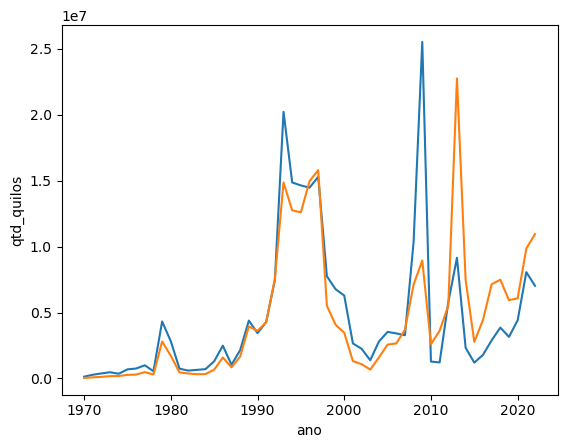

In [89]:
# Série temporal de exportação
serie_anual_df = exportacao_vinho_clean_df[['ano','qtd_quilos','valor_us']].groupby(by='ano', as_index=False).sum()

sns.lineplot(data=serie_anual_df, x='ano', y='qtd_quilos')
sns.lineplot(data=serie_anual_df, x='ano', y='valor_us')

# fig = plt.figure(figsize=(10,5))
# ax = plt.plot(data=serie_anual_df, x='ano', y='qtd_quilos')